In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv('granger GDP GFCF - GDP.csv')

In [42]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('usedlag: %i' % result[2])
    print('# obs: %i' % result[3])
    if result[1] >= 0.1:
        print('not significant')
    else:
        print('significant')

In [56]:
country = 'Bahrain'

In [57]:
newData = pd.DataFrame()

In [58]:
newData['Year'] = data['Year']
newData[country+ ' GDP'] = data[country+ ' GDP']
newData[country+ ' GFCF'] = data[country+ ' GFCF']

In [59]:
avgs = newData.mean()
devs = newData.std()

In [60]:
for col in newData.columns:
    newData[col] = (newData[col] - avgs.loc[col])/ devs.loc[col]

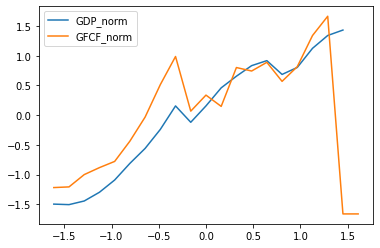

In [61]:
GDP_DIFF, = plt.plot(newData['Year'], newData[country+ ' GDP'])
GFCF_DIFF, = plt.plot(newData['Year'], newData[country+ ' GFCF'])
plt.legend(['GDP_norm', 'GFCF_norm'])
plt.show()

In [62]:
ts_df = pd.DataFrame(columns=[country+ ' GDP', country + ' GFCF' ], data= zip(newData[country+' GDP'], newData[country+' GFCF']))

In [63]:
perform_adf_test(ts_df[country+' GDP'][1:20])

ADF Statistic: -0.966601
p-value: 0.765250
usedlag: 7
# obs: 11
not significant


In [64]:
perform_adf_test(ts_df[country+' GFCF'][1:20])

ADF Statistic: -2.203221
p-value: 0.205078
usedlag: 0
# obs: 18
not significant


# first order differncing

In [65]:
ts_df[country+ ' GDP 1st diff'] = newData[country+ ' GDP'].diff()
ts_df[country+ ' GFCF 1st diff'] = newData[country+ ' GFCF'].diff()

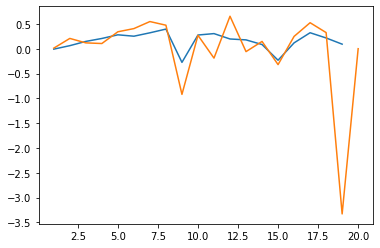

In [66]:
plt.plot(ts_df[country+ ' GDP 1st diff'])
plt.plot(ts_df[country+ ' GFCF 1st diff'])
plt.show()

In [67]:
perform_adf_test(ts_df[country+' GDP 1st diff'][1:20])

ADF Statistic: -0.487437
p-value: 0.894445
usedlag: 6
# obs: 12
not significant


In [68]:
perform_adf_test(ts_df[country+' GFCF 1st diff'][1:20])

ADF Statistic: -2.492719
p-value: 0.117256
usedlag: 2
# obs: 16
not significant


# second order differencing

In [73]:
ts_df[country+' GDP 2nd diff'] = ts_df[country+ ' GDP 1st diff'].diff()
ts_df[country+' GFCF 2nd diff'] = ts_df[country+ ' GFCF 1st diff'].diff()

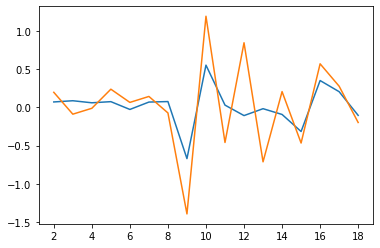

In [76]:
plt.plot(ts_df[country+' GDP 2nd diff'][2:19])
plt.plot(ts_df[country+' GFCF 2nd diff'][2:19])
plt.show()

In [78]:
perform_adf_test(ts_df[country+' GDP 2nd diff'][2:19])

ADF Statistic: -2.284658
p-value: 0.176964
usedlag: 5
# obs: 11
not significant


In [79]:
perform_adf_test(ts_df[country+' GFCF 2nd diff'][2:19])

ADF Statistic: -3.670365
p-value: 0.004550
usedlag: 3
# obs: 13
significant


# third order differencing

In [80]:
ts_df[country+' GDP 3rd diff'] = ts_df[country+ ' GDP 2nd diff'].diff()
ts_df[country+' GFCF 3rd diff'] = ts_df[country+ ' GFCF 2nd diff'].diff()

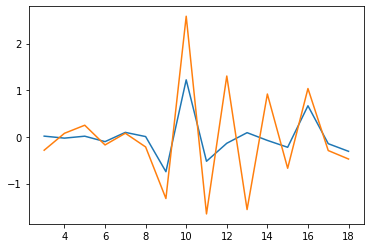

In [82]:
plt.plot(ts_df[country+' GDP 3rd diff'][3:19])
plt.plot(ts_df[country+' GFCF 3rd diff'][3:19])
plt.show()

In [83]:
perform_adf_test(ts_df[country+' GDP 3rd diff'][3:19])

ADF Statistic: -5.805333
p-value: 0.000000
usedlag: 6
# obs: 9
significant


In [84]:
perform_adf_test(ts_df[country+' GFCF 3rd diff'][3:19])

ADF Statistic: -2.071769
p-value: 0.256017
usedlag: 5
# obs: 10
not significant
